In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("data/jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [15]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

### Q1:

In [9]:
del df['student_id']
df.fillna(0, inplace=True)

In [10]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)


y_train = df_train['jamb_score']
y_val = df_val['jamb_score']
y_test = df_test['jamb_score']

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

df_train = df_train.to_dict(orient="records")
df_val = df_val.to_dict(orient="records")
df_test = df_test.to_dict(orient="records")

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(df_train)
X_val = dv.fit_transform(df_val)
X_test = dv.fit_transform(df_test)

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [24]:
from sklearn.tree import export_text, plot_tree

In [40]:
export_text(model, feature_names=dv.feature_names_)    

'|--- study_hours_per_week <= 18.50\n|   |--- value: [156.06]\n|--- study_hours_per_week >  18.50\n|   |--- value: [188.77]\n'

### Q2:

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [43]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [45]:
pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_true=y_val, y_pred=pred))

rmse

41.60899752457394

In [57]:
lst = []

for est in range(10, 210, 10):
    rf = RandomForestRegressor(n_estimators=est, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_true=y_val, y_pred=pred))
    lst.append((est, round(rmse,3)))

In [58]:
lst

[(10, 41.609),
 (20, 40.937),
 (30, 40.404),
 (40, 40.251),
 (50, 40.326),
 (60, 40.284),
 (70, 40.215),
 (80, 40.223),
 (90, 40.296),
 (100, 40.349),
 (110, 40.326),
 (120, 40.306),
 (130, 40.334),
 (140, 40.321),
 (150, 40.299),
 (160, 40.323),
 (170, 40.329),
 (180, 40.354),
 (190, 40.366),
 (200, 40.378)]

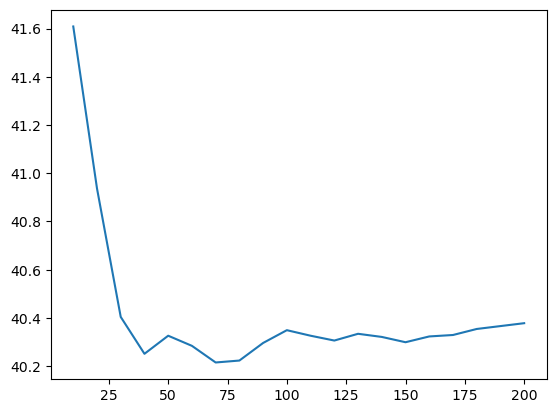

In [59]:
plt.plot(*zip(*lst))

### Q4:

In [61]:
lst = []

for depth in [10, 15, 20, 25]:
    for est in range(10, 210, 10):
        rf = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_true=y_val, y_pred=pred))
        lst.append((depth, est, round(rmse,3)))

In [72]:
lst[np.argmin(np.array(lst)[:, 2])]

(10, 70, 39.779)

### Q5:

In [74]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [81]:
imp = list(zip(list(df_train[0].keys()), rf.feature_importances_))

In [89]:
imp = sorted(imp, key=lambda x:x[1], reverse=True)
[ele for ele in imp if ele[0] in ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']]

[('teacher_quality', 0.06683350285686446),
 ('distance_to_school', 0.03139093860845524),
 ('study_hours_per_week', 0.010946089136573606),
 ('attendance_rate', 0.010089609948264307)]

### Q6:

In [92]:
import xgboost as xgb

In [93]:
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, y_train, feature_names=features)
dval = xgb.DMatrix(X_val, y_val, feature_names=features)

In [95]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [94]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [97]:
output = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)
output

[0]	train-rmse:42.91051	val-rmse:44.64705
[1]	train-rmse:40.11270	val-rmse:42.58787
[2]	train-rmse:38.22082	val-rmse:41.29400
[3]	train-rmse:36.84288	val-rmse:40.86943
[4]	train-rmse:35.61478	val-rmse:40.40802
[5]	train-rmse:34.75100	val-rmse:40.18339
[6]	train-rmse:34.01920	val-rmse:40.01861
[7]	train-rmse:33.57026	val-rmse:39.83977
[8]	train-rmse:33.06957	val-rmse:39.77520
[9]	train-rmse:32.53383	val-rmse:39.67272
[10]	train-rmse:31.99488	val-rmse:39.86428
[11]	train-rmse:31.63632	val-rmse:39.94614
[12]	train-rmse:31.06808	val-rmse:40.22402
[13]	train-rmse:30.66612	val-rmse:40.21996
[14]	train-rmse:30.22377	val-rmse:40.23733
[15]	train-rmse:29.89650	val-rmse:40.13093
[16]	train-rmse:29.65509	val-rmse:40.23658
[17]	train-rmse:29.39022	val-rmse:40.26492
[18]	train-rmse:28.87405	val-rmse:40.34034
[19]	train-rmse:28.49540	val-rmse:40.30164
[20]	train-rmse:28.09664	val-rmse:40.26037
[21]	train-rmse:27.63299	val-rmse:40.23921
[22]	train-rmse:27.20857	val-rmse:40.28724
[23]	train-rmse:26.73

In [175]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [176]:
scores = {}

In [181]:
%%capture output
   
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [182]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

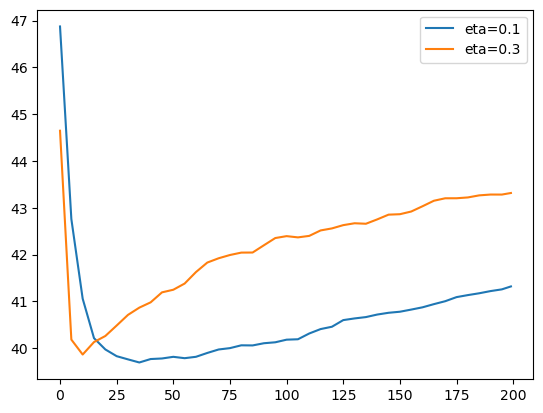

In [183]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()